# Narongkrit Khieopraphatsorn ID: 3975261346

# HW2_INF 552

# 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics, neighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## (a) Download the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
!git clone "https://github.com/Tony-nkt/inf_552.git"
fileName = "Folds5x2_pp.xlsx"
df = pd.read_excel(fileName, index_col=None)
print(df)
df_info = df.describe()
print(df_info)

fatal: destination path 'inf_552' already exists and is not an empty directory.
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.4

## (b) Exploring the data:

##  i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
X = df.drop('PE',axis=1)
y = df['PE']
df.shape

(9568, 5)

### Explanation for question 1.)

### There are 9568 rows and 5 columns. The rows represent the data points while, the columns represent the features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

## ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

## ii.a) scatterplot all of the variables (including independent and dependent variables)

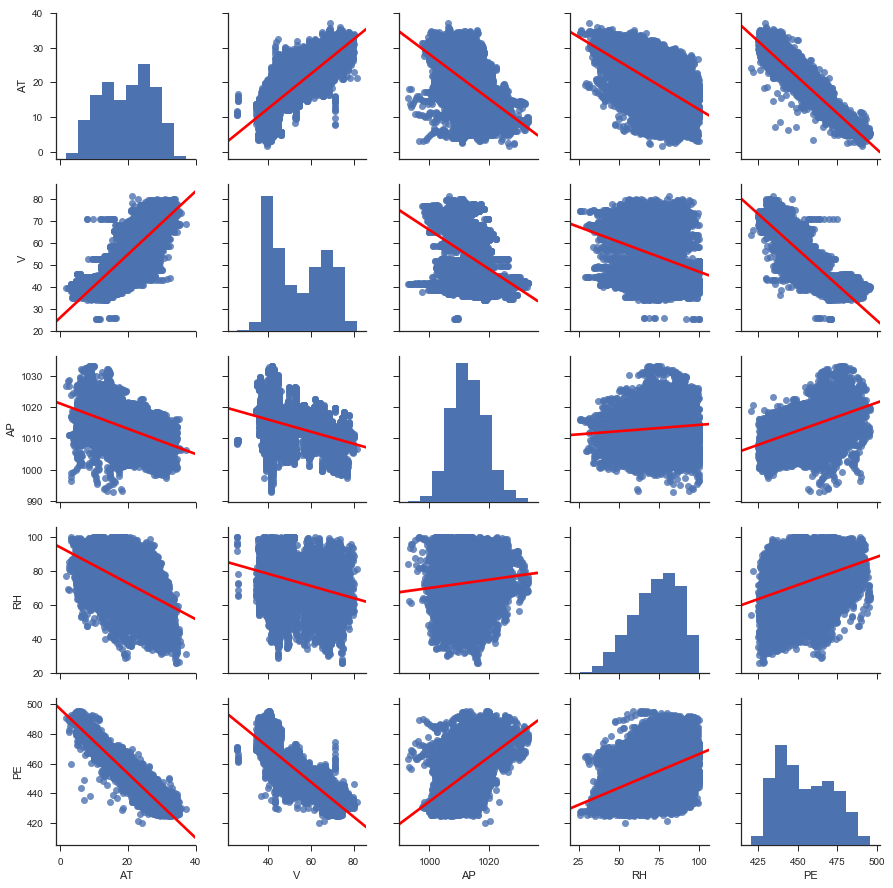

In [4]:
sns.set(style = "ticks", color_codes=True)
g = sns.pairplot(df,  kind="reg", plot_kws={'line_kws':{'color':'red'}})

## ii.b) scatterplot for each independent variable ("AT", "V", "AP", "RH") versus dependent variable ("PE")

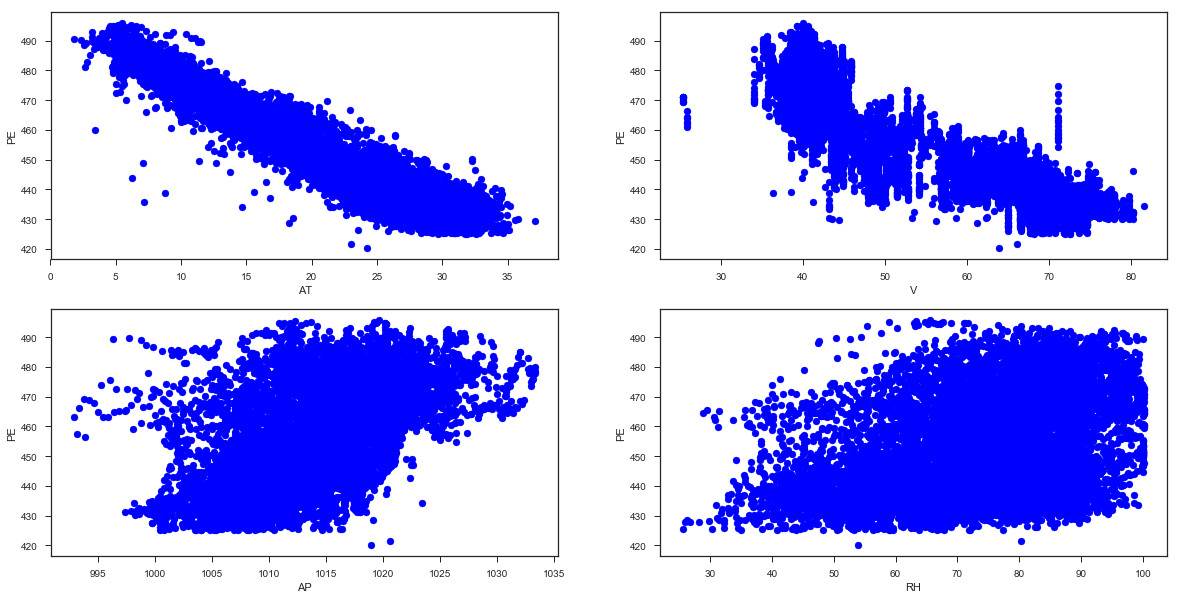

In [5]:
plt.figure(figsize=(20,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.scatter(X[[var]], y,  color='blue')
    plt.xlabel(var)
    plt.ylabel('PE')
plt.show()

## iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [6]:
descript = {}
mean = []
median = []
stat_range = []
first_quartile = []
third_quartile = []
inter_quartile = []

def assign(tmp,fn):
    for var in df.columns:
        if fn == "mean":
            tmp.append(df[var].mean())
        elif fn == "median":
            tmp.append(df[var].median())
        elif fn == "stat_range":
            tmp.append(df[var].max()-df[var].min())
        elif fn == "first_quartile":
            tmp.append(df[var].quantile(0.25))
        elif fn == "third_quartile":
            tmp.append(df[var].quantile(0.75))
        elif fn == "inter_quartile":
            tmp.append(df[var].quantile(0.75)-df[var].quantile(0.25))
    descript[fn] = tmp
    
assign(mean,"mean")
assign(median,"median")
assign(stat_range,"stat_range")
assign(first_quartile,"first_quartile")
assign(third_quartile,"third_quartile")
assign(inter_quartile,"inter_quartile")

In [7]:
descript = pd.DataFrame(descript,index=[df.columns]).T
descript

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
stat_range,35.300000,56.200000,40.410000,74.600000,75.500000
first_quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third_quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
inter_quartile,12.210000,24.800000,8.160000,21.502500,28.680000


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [8]:
predictions = {}
simple_coef = []
simple_MSE = {}

for var in X.columns:
    lm = LinearRegression()
    lm.fit(X[[var]],y)
    predictions[var] = lm.predict(X[[var]])
    simple_MSE[var] = metrics.mean_squared_error(predictions[var],y)
    simple_coef.append(lm.coef_[0])

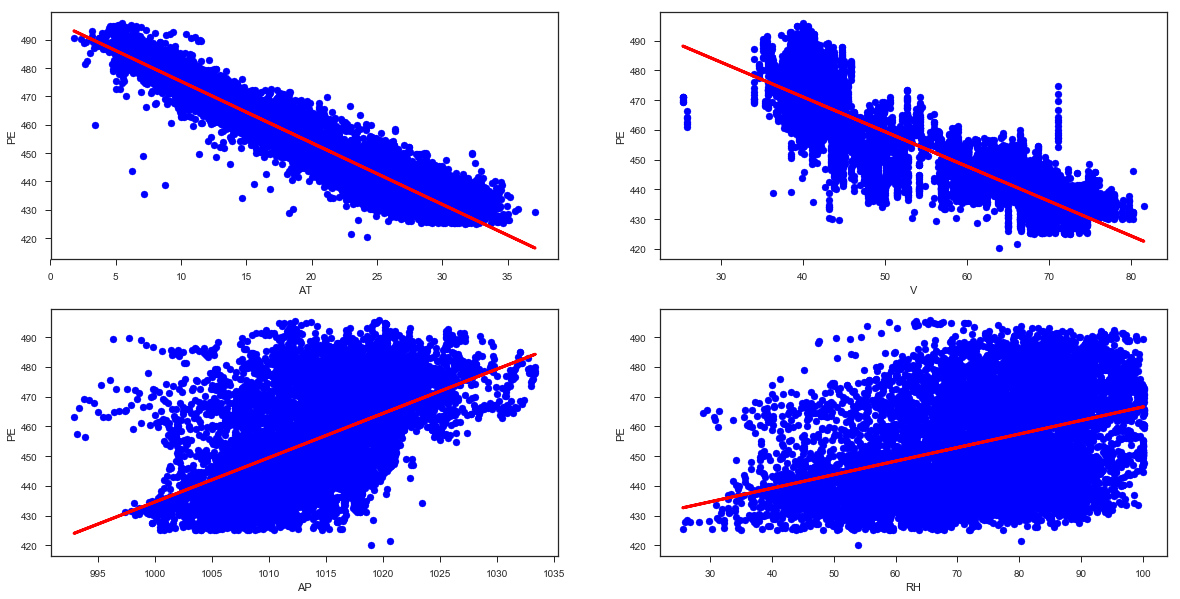

In [9]:
plt.figure(figsize=(20,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.scatter(X[[var]], y,  color='blue')
    plt.plot(X[[var]], predictions[var], color='red',linewidth=3)
    plt.xlabel(var)
    plt.ylabel('PE')
plt.show()

In [10]:
print("Simple linear regression","\n")

for var in X.columns:
    
    X_stat = X[[var]]
    y_stat = y
    X_stat = sm.add_constant(X_stat)

    # Note the difference in argument order
    model = sm.OLS(y_stat, X_stat).fit() ## sm.OLS(output, input)
    
    print("This is for the independent variable: " + var + "\n")
    # Print out the statistics
    print(model.summary(),"\n")
    
    print("MSE for",var,":",simple_MSE[var],"\n")
    print("--------------------------------------------\n")

Simple linear regression 

This is for the independent variable: AT

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:23   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


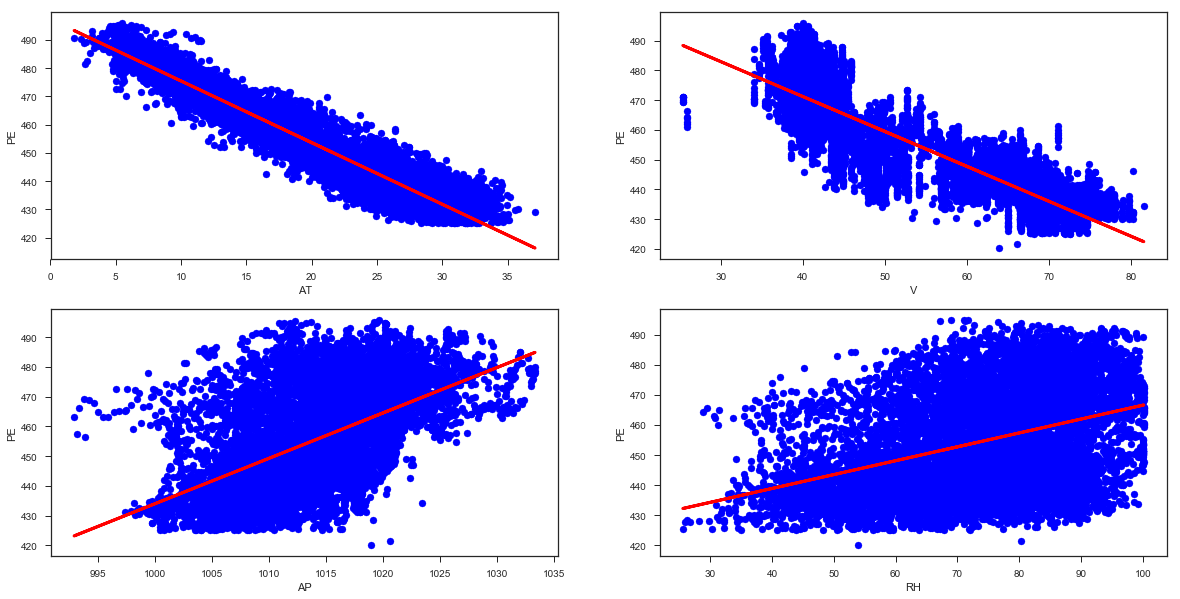

In [11]:
predictions = {}
outlier = {}
outlier_MSE = {}

for var in X.columns:
    score = []
    predict = []
    tmp = df[[var,"PE"]] 
    lm.fit(tmp[[var]],tmp[["PE"]])
    predictions[var] = lm.predict(tmp[[var]])
    y_tmp = np.array(tmp[["PE"]])
    score = []
    for var1, var2 in zip(y_tmp,predictions[var]):
        error = (float(var1)-float(var2))**2
        score.append(error)
    twenty_highest = sorted(score, reverse=True)[19]
    tmp["mse"] = pd.Series(score)
    tmp = tmp[tmp["mse"]<twenty_highest]
    lm.fit(tmp[[var]],tmp[["PE"]])
    predictions[var] = lm.predict(tmp[[var]])
    outlier[var] = tmp[[var,"PE"]]
    outlier_MSE[var] = metrics.mean_squared_error(predictions[var],tmp["PE"])
    
plt.figure(figsize=(20,10))

for i, var in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.scatter(outlier[var][var], outlier[var]["PE"],  color='blue')
    plt.plot(outlier[var][var], predictions[var] , color='red',linewidth=3)
    plt.xlabel(var)
    plt.ylabel('PE')
plt.show()

In [12]:
print("This is for simple linear regression","\n")

for var in X.columns:
    
    data_X = outlier[var][var]
    data_y = outlier[var]["PE"]
    X_stat = data_X
    y_stat = data_y
    X_stat = sm.add_constant(X_stat)
    model = sm.OLS(y_stat, X_stat).fit()
    print("This is for independent variable: " + var + "\n")
    print(model.summary(),"\n")
    print("MSE for this",var,"without outlier:",outlier_MSE[var],"\n")
    print("--------------------------------------------\n")

This is for simple linear regression 

This is for independent variable: AT

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 9.027e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -29430.
No. Observations:                9548   AIC:                         5.886e+04
Df Residuals:                    9546   BIC:                         5.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### Explanation for question c.) :

### The description of result you can see above. All models are a statistically significant association between the predictor ("AT","V","AP","RH") and the response ("PE") since the P-values of all predictors are 0.00 (< 0.05).

### Yes, I would like to remove the outliers from the data for each regression task by removing the points which are in the top 20 of the highest mean square error.

### The result is that the MSEs of the models without outliers are decresing from the MSEs of models with outliers.

### R-squared of the models without outliers are increasing.

___________________________________________________________________________

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [13]:
multiple_coef = []
lm = LinearRegression()
lm.fit(X,y)
multiple_coef = lm.coef_
predictions = lm.predict(X)

In [14]:
X_stat = X
y_stat = y
X_stat = sm.add_constant(X_stat)
model = sm.OLS(y_stat, X_stat).fit()
print("This is for multiple regression","\n")
print(model.summary(),"\n")
print("MSE with this multiple regression model: ",metrics.mean_squared_error(y, predictions),"\n")
print("-------------------------------")

This is for multiple regression 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6

### Explanation for question d.)

### The description of result you can see above. All predictors ("AT","V","AP","RH") can reject the null hypothesis because those p-values of them are 0 (p < 0.05).

_____________

## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

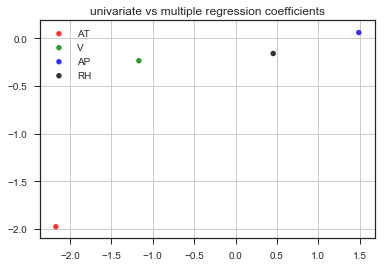

In [15]:
colors = ("red", "green", "blue", "black")

fig = plt.figure()

for a, b, color, group in zip(simple_coef, multiple_coef, colors, X.columns):    
    plt.scatter(a, b, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('univariate vs multiple regression coefficients')
plt.legend(loc=2)
plt.grid(True)
plt.show()

### Explanation for question e.)

### The results of 1d.) model is better than 1c.) model because of MSE ,20.76 (from 1d.) is less than 27.84 (lowest one from 1c.) The plots are above.

_____________________

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

## Y = β0 + β1X + β2X2 + β3X3 + ε

In [16]:
print("This is for all pairwise interaction for linear regression","\n")

for var in X.columns:
    poly_features = PolynomialFeatures(degree = 3)
    X_poly = poly_features.fit_transform(X[[var]])
    X_poly = X_poly[:,1:]
    X_stat = X_poly
    y_stat = y
    X_stat = sm.add_constant(X_stat)
    model = sm.OLS(y_stat, X_stat).fit()
    print("The independent variables =",var,"\n")
    print("Form of the features:" ,poly_features.get_feature_names()[1:],"\n")
    print(model.summary(),"\n")

This is for all pairwise interaction for linear regression 

The independent variables = AT 

Form of the features: ['x0', 'x0^2', 'x0^3'] 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

### Explanation for question f.)

### Yes, all four variables have nonlinear association with the response
### in most of models, p-value of those variables in each model is 0 (p < 0.05). Although, as you see from the stats of each model, the p-value of x0^2 in V model is higher than 0.05 (0.768) but other independent variables, x0^3 in V model is still less than 0.05 (0.014). So, all models have nonlinear association between any of the predictors and the response.

____________

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [17]:
print("This is for all pairwise interaction for linear regression","\n")

poly_features = PolynomialFeatures(degree = 2, interaction_only=True) 
X_poly = poly_features.fit_transform(X)
X_poly = X_poly[:,1:]
X_stat = X_poly
y_stat = y
X_stat = sm.add_constant(X_stat)
model = sm.OLS(y_stat, X_stat).fit() 

print("The independent variables =",X.columns,"\n")
print("Form of the features:" ,poly_features.get_feature_names()[1:],"\n")
print(model.summary(),"\n")

This is for all pairwise interaction for linear regression 

The independent variables = Index(['AT', 'V', 'AP', 'RH'], dtype='object') 

Form of the features: ['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3'] 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust           

### Explanation for question g.)

### Yes, there is the evidence of association of interactions of predictors with the response. 

The independent variables = 'AT', 'V', 'AP', 'RH' which equals to 'x0','x1','x2','x3' represented in form of the features respectively.
 
'x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3' ( Indexes Form of the features ) 

x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 ( Indexes from the stats model )

### "AT","V","AP","RH","AT-V","AT-AP","AT-RH","V-AP","V-RH", "AP-RH" ( name of the features )

Only x5, x7, x8, x10 have p-value less than 0.05.

### It means that terms "AT-V", "AT-RH", "V-AP", "AP-RH" are statistically significant.

________

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.


### Model 1.) Multiple Linear Regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
X_stat = X_train
y_stat = y_train
X_stat = sm.add_constant(X_stat)
model = sm.OLS(y_stat, X_stat).fit()
print("This is for multiple linear regression","\n")
print("The independent variables =",X.columns,"\n")
print(model.summary(),"\n")
print("-------------------------------")

This is for multiple linear regression 

The independent variables = Index(['AT', 'V', 'AP', 'RH'], dtype='object') 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:30:24   Log-Likelihood:                -19529.
No. Observations:                6697   AIC:                         3.907e+04
Df Residuals:                    6692   BIC:                         3.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

### Model 2.) Multiple Linear Regression involving all possible interaction terms and quadratic nonlinearities

In [19]:
poly_features = PolynomialFeatures(degree = 4, interaction_only=True) 
X_poly = poly_features.fit_transform(X_train)
X_poly = X_poly[:,1:]
z = np.square(X_train.AT.values).reshape(-1,1)
X_poly = np.append(X_poly, z, axis = 1)
z = np.square(X_train.V.values).reshape(-1,1)
X_poly = np.append(X_poly, z, axis = 1)
z = np.square(X_train.AP.values).reshape(-1,1)
X_poly = np.append(X_poly, z, axis = 1)
z = np.square(X_train.RH.values).reshape(-1,1)
X_poly = np.append(X_poly, z, axis = 1)
X_stat = X_poly
y_stat = y_train
X_stat = sm.add_constant(X_stat)
model = sm.OLS(y_stat, X_stat).fit()

print("This is for multiple regression with all possible interaction terms and  quadratic nonlinearity associations","\n")
print("The independent variables =",X.columns,"\n")
name_features = []
name_features += poly_features.get_feature_names()[1:] + ['x0^2','x1^2','x2^2','x3^2']
print("Form of the features:" ,name_features,"\n")
print("Name of the features:" ,["AT","V","AP","RH","AT-V","AT-AP","AT-RH","V-AP","V-RH", "AP-RH","AT-V-AP","AT-V-RH","AT-AP-RH","V-AP-RH","AT-V-AP-RH",'AT^2', 'V^2', 'AP^2', 'RH^2'],"\n")
print(model.summary(),"\n")
print("-------------------------------")

This is for multiple regression with all possible interaction terms and  quadratic nonlinearity associations 

The independent variables = Index(['AT', 'V', 'AP', 'RH'], dtype='object') 

Form of the features: ['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3', 'x0 x1 x2', 'x0 x1 x3', 'x0 x2 x3', 'x1 x2 x3', 'x0 x1 x2 x3', 'x0^2', 'x1^2', 'x2^2', 'x3^2'] 

Name of the features: ['AT', 'V', 'AP', 'RH', 'AT-V', 'AT-AP', 'AT-RH', 'V-AP', 'V-RH', 'AP-RH', 'AT-V-AP', 'AT-V-RH', 'AT-AP-RH', 'V-AP-RH', 'AT-V-AP-RH', 'AT^2', 'V^2', 'AP^2', 'RH^2'] 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5649.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        2

### Model 3.) from model 2.) with removing insignificant variables using p-values¶

Since the p-value of x17 which is equals to V^2 is 0.344 (> 0.05), so we remove V^2 from the model.

In [20]:
new_X_poly = np.delete(X_poly, [16], axis=1)

x17 is in index of 16 in X_poly

In [21]:
X_stat = new_X_poly
y_stat = y_train
X_stat = sm.add_constant(X_stat)
model = sm.OLS(y_stat, X_stat).fit()
print("This is for multiple regression with all possible interaction terms and  quadratic nonlinearity associations","\n")
print("The independent variables =",X.columns,"\n")
print("Remove: x17 ( V^2 )","\n")
print("Form of the features:" , poly_features.get_feature_names()[1:] + ['x0^2', 'x2^2', 'x3^2'] ,"\n")
print("Name of the features:" ,["AT","V","AP","RH","AT-V","AT-AP","AT-RH","V-AP","V-RH", "AP-RH","AT-V-AP","AT-V-RH","AT-AP-RH","V-AP-RH","AT-V-AP-RH",'AT^2', 'AP^2', 'RH^2'],"\n")
print(model.summary(),"\n")
print("-------------------------------")

This is for multiple regression with all possible interaction terms and  quadratic nonlinearity associations 

The independent variables = Index(['AT', 'V', 'AP', 'RH'], dtype='object') 

Remove: x17 ( V^2 ) 

Form of the features: ['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2', 'x1 x3', 'x2 x3', 'x0 x1 x2', 'x0 x1 x3', 'x0 x2 x3', 'x1 x2 x3', 'x0 x1 x2 x3', 'x0^2', 'x2^2', 'x3^2'] 

Name of the features: ['AT', 'V', 'AP', 'RH', 'AT-V', 'AT-AP', 'AT-RH', 'V-AP', 'V-RH', 'AP-RH', 'AT-V-AP', 'AT-V-RH', 'AT-AP-RH', 'V-AP-RH', 'AT-V-AP-RH', 'AT^2', 'AP^2', 'RH^2'] 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5963.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                  

### Calculate MSE:  Model 1.) Multiple Linear Regression

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

print("This is for multiple regression")
print("MSE for train: " ,metrics.mean_squared_error(y_train, predictions_train))
print("MSE for test: " ,metrics.mean_squared_error(y_test, predictions_test))

This is for multiple regression
MSE for train:  19.969376443975676
MSE for test:  22.658769778031022


### Calculate MSE: Model 2.) Multiple Linear Regression involving all possible interaction terms and quadratic nonlinearities

In [23]:
lm = LinearRegression()
lm.fit(X_poly,y_train)

poly_features = PolynomialFeatures(degree = 4, interaction_only=True) 
X_poly_test = poly_features.fit_transform(X_test)
X_poly_test = X_poly_test[:,1:]

z = np.square(X_test.AT.values).reshape(-1,1)
X_poly_test = np.append(X_poly_test, z, axis = 1)
z = np.square(X_test.V.values).reshape(-1,1)
X_poly_test = np.append(X_poly_test, z, axis = 1)
z = np.square(X_test.AP.values).reshape(-1,1)
X_poly_test = np.append(X_poly_test, z, axis = 1)
z = np.square(X_test.RH.values).reshape(-1,1)
X_poly_test = np.append(X_poly_test, z, axis = 1)

predictions_train = lm.predict(X_poly)
print("MSE for train: " ,metrics.mean_squared_error(y_train, predictions_train))
predictions_test = lm.predict(X_poly_test)
print("MSE for test: " ,metrics.mean_squared_error(y_test, predictions_test))

MSE for train:  16.956356492355827
MSE for test:  19.557719384213453


### Calculate MSE: Model 3.) from model 2.) with removing insignificant variables using p-values

In [24]:
lm = LinearRegression()
lm.fit(new_X_poly,y_train)

new_X_poly_test = np.delete(X_poly_test, [16], axis=1)

predictions_train = lm.predict(new_X_poly)
print("MSE for train: " ,metrics.mean_squared_error(y_train, predictions_train))
predictions_test = lm.predict(new_X_poly_test)
print("MSE for test: " ,metrics.mean_squared_error(y_test, predictions_test))

MSE for train:  16.95863225225434
MSE for test:  19.55412416992718


### Explanation for question h.)

### I can improve my model as you can see the result below

In [25]:
table = pd.DataFrame(columns = ["MSE for train","MSE for test"] )
table.loc["Multiple Linear Regression"] = [19.969376443975676,22.658769778031022]
table.loc["Multiple Linear Regression involving all possible interaction terms and quadratic nonlinearities with removing insignificant variables using p-values"] = [16.95863225225434,19.55412416992718]

table

,MSE for train,MSE for test
Multiple Linear Regression,19.969376,22.658770
Multiple Linear Regression involving all possible interaction terms and quadratic nonlinearities with removing insignificant variables using p-values,16.958632,19.554124


_________

## (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.


### With raw features

In [26]:
raw_test_error_rate = []

for i in range(1,101):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    raw_test_error_rate.append(metrics.mean_squared_error(y_test,pred_i))    

In [27]:
raw_train_error_rate = []

for i in range(1,101):
    
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    raw_train_error_rate.append(metrics.mean_squared_error(y_train,pred_i))

### With normalized Features

Using MinMaxScaler() to normalize the features

In [28]:
norm_test_error_rate = []

for i in range(1,101):
    
    knn = make_pipeline(MinMaxScaler(),neighbors.KNeighborsRegressor(n_neighbors=i))
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    norm_test_error_rate.append(metrics.mean_squared_error(y_test,pred_i))

In [29]:
norm_train_error_rate = []

for i in range(1,101):
    
    knn = make_pipeline(MinMaxScaler(),neighbors.KNeighborsRegressor(n_neighbors=i))
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    norm_train_error_rate.append(metrics.mean_squared_error(y_train,pred_i))

### Predict train data and plot train error rate vs 1/K value

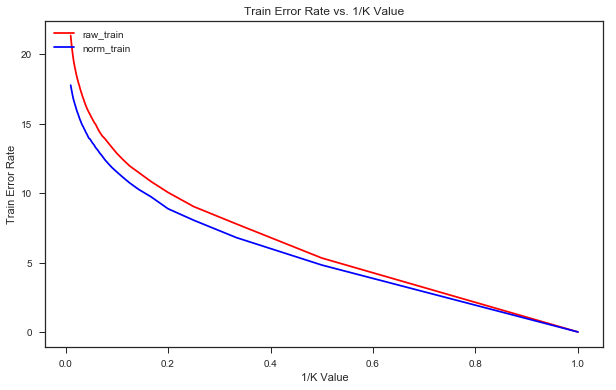

In [30]:
plt.figure(figsize=(10,6))
plt.plot(1 / np.array(range(1,101)) ,raw_train_error_rate,color='red',label = "raw_train")
plt.plot(1 /np.array(range(1,101)) ,norm_train_error_rate,color='blue',label = "norm_train")
plt.title('Train Error Rate vs. 1/K Value')
plt.xlabel('1/K Value')
plt.ylabel('Train Error Rate')
plt.legend(loc=2)
plt.show()

### Predict test data and plot test error rate vs 1/K value

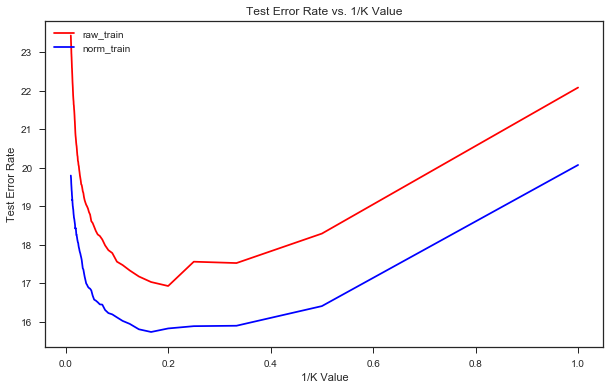

In [31]:
plt.figure(figsize=(10,6))
plt.plot(1 / np.array(range(1,101)) ,raw_test_error_rate,color='red',label = "raw_train")
plt.plot(1 /np.array(range(1,101)) ,norm_test_error_rate,color='blue',label = "norm_train")
plt.title('Test Error Rate vs. 1/K Value')
plt.xlabel('1/K Value')
plt.ylabel('Test Error Rate')
plt.legend(loc=2)
plt.show()

### Explanation for question i.)

### Summarize for raw features

In [32]:
print("For raw Features.","\n")

print("MSE Train error for KNN regression: ",min(raw_train_error_rate))

print("K that gives the lowest MSE train error for KNN regression: ",range(1,101,1)[raw_train_error_rate.index(min(raw_train_error_rate))],"\n")

print("MSE Test error for KNN regression: ", min(raw_test_error_rate))
                                                                                  
print("K that gives the lowest MSE Test error for KNN regression: ",range(1,101,1)[raw_test_error_rate.index(min(raw_test_error_rate))])
                                                                                 

For raw Features. 

MSE Train error for KNN regression:  0.0
K that gives the lowest MSE train error for KNN regression:  1 

MSE Test error for KNN regression:  16.927570981539542
K that gives the lowest MSE Test error for KNN regression:  5


### Summarize for normalized features

In [33]:
print("For Normalized Features.","\n")

print("MSE Train error for KNN regression: ",min(norm_train_error_rate))

print("K that gives the lowest MSE train error for KNN regression: ",range(1,101)[norm_train_error_rate.index(min(norm_train_error_rate))],"\n")

print("MSE Test error for KNN regression: ",min(norm_test_error_rate))
                                                                                  
print("K that gives the lowest MSE Test error for KNN regression: ",range(1,101)[norm_test_error_rate.index(min(norm_test_error_rate))])
                                                                                 
                                                                                  

For Normalized Features. 

MSE Train error for KNN regression:  0.0
K that gives the lowest MSE train error for KNN regression:  1 

MSE Test error for KNN regression:  15.733712158945783
K that gives the lowest MSE Test error for KNN regression:  6


## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

### Explanation on question j.)

### The smallest the test error (calculated by MSE) for KNN Regression = 15.733712158945783 (with normalized features)

### The smallest the test error (calculated by MSE) for Linear Regression = 19.55412416992718 (with removing some insignificant variables)

### The analysis is that there are lot of data points (9568) in this dataset and small main predictors (4 predictors). So, the model should fit for a flexible approach. KNN regression is a flexible approach meanwhile linear regression is an inflexible approach.

## 2. ISLR: 2.4.1

## 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

## Answer

### a.) Better because a flexible method can fit the data closer with a large sample size than an inflexble method.

### b.) Worse because a flexible method can overfit the smaller samples.

### c.) Better because more degrees of freedoms, better the data been fit than an inflexble method.

### d.) Worse because a flexible method can fit the data with the noise and increase the variance.

## 3. ISLR: 2.4.7

## The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.


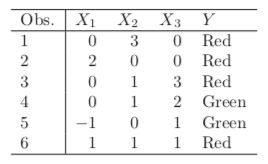

## Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.
### (b) What is our prediction with K = 1? Why?
### (c) What is our prediction with K = 3? Why?
### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?


## Answer

In [34]:
df_q3 = pd.DataFrame({"X1":[0,2,0,0,-1,1],"X2":[3,0,1,1,0,1],"X3":[0,0,3,2,1,1],"Y":["Red","Red","Red","Green","Green","Red"]})

### a.)

In [35]:
df_q3["distance"] = np.sqrt( (df_q3["X1"] - 0)**2 + (df_q3["X2"] - 0)**2 + (df_q3["X3"]-0)**2) 
df_q3

,X1,X2,X3,Y,distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


### b.) Green Color

#### The nearest neighbor of [0,0,0]  is [-1,0,1] because it's has the lowest distance. [-1.0,1] position has Y = green. So, it's green.

In [36]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(df_q3[["X1","X2","X3"]],df_q3["Y"])
pred = knn.predict([[0,0,0]])
print(pred)

['Green']


### c.) Red Color

#### The 3 nearest neighbors of [0,0,0]  is [-1,0,1], [1,1,1] and [2,0,0]. The 2 of their positions have Y = red. So, it's red.

In [37]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(df_q3[["X1","X2","X3"]],df_q3["Y"])
pred = knn.predict([[0,0,0]])
print(pred)

['Red']


### d.) The boundary becomes linear, as K becomes larger. So, The best K value would be small.